In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/yazel/Downloads/son_hali.csv')

In [3]:
df = df.drop(columns = ['roomAndLivingRoom', 'price_category', 'price_category', 'area_name', 'county_name', 
                        'sakarya_center_category', 'karasu_category', 'sapanca_category', 'sakarya_university_category', 
                        
                        'floorName', 'residence_name', 'usage_name', 'yakit', 'isitma', 'bulunan_yonler', 
                        'property_type', 'yapiDurumu', 'registerState'])

In [4]:
import numpy as np
from scipy import stats
# Z-score hesapla
z_scores = stats.zscore(df['price'])

# Eşik belirle (genelde 3 kullanılır)
threshold = 3

# Aykırı olmayan değerleri filtrele
df_temiz = df[np.abs(z_scores) < threshold]

# Kaç aykırı değer vardı?
print(f"Aykırı değer sayısı: {len(df) - len(df_temiz)}")

Aykırı değer sayısı: 35


In [5]:
df = df[z_scores < threshold]

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Özellikler ve hedef ayrımı (örnek)
X = df.drop('price', axis=1)
y = df['price']

# Eğitim ve test veri kümesini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametre arama için grid
param_grid = {
    'max_depth': [3, 5, 7, 10,15,20,25,13],
    'min_samples_leaf': [5, 10, 20,15,25,17]
}

# GridSearchCV ile en iyi modeli bul
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("✅ En iyi parametreler:", grid_search.best_params_)

# -------------------------------
# Cross-validation eğitim verisi
train_cv_r2 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
train_cv_mse = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Cross-validation test verisi
test_cv_r2 = cross_val_score(best_model, X_test, y_test, cv=5, scoring='r2')
test_cv_mse = -cross_val_score(best_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# -------------------------------
# Ortalama metrikleri yazdır
print("\n📊 Eğitim Seti Üzerinden Cross-Validation:")
print(f"📈 Ortalama R²: {np.mean(train_cv_r2):.3f}")
print(f"📉 Ortalama MSE: {np.mean(train_cv_mse):.3f}")

print("\n🧪 Test Seti Üzerinden Cross-Validation:")
print(f"📈 Ortalama R²: {np.mean(test_cv_r2):.3f}")
print(f"📉 Ortalama MSE: {np.mean(test_cv_mse):.3f}")


✅ En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 20}

📊 Eğitim Seti Üzerinden Cross-Validation:
📈 Ortalama R²: 0.857
📉 Ortalama MSE: 1675142447935.826

🧪 Test Seti Üzerinden Cross-Validation:
📈 Ortalama R²: 0.797
📉 Ortalama MSE: 2241258347432.733


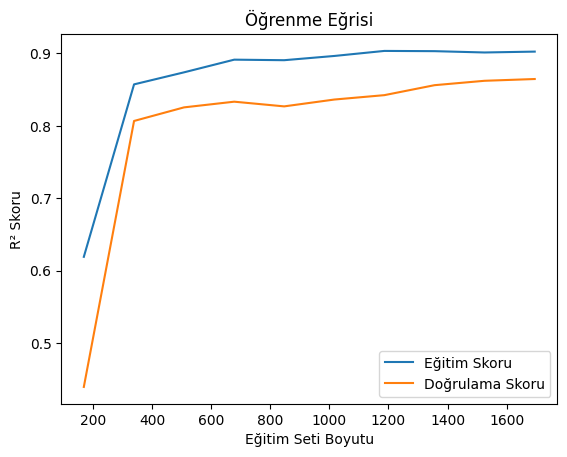

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
   best_model , X, y, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Eğitim Skoru')
plt.plot(train_sizes, test_mean, label='Doğrulama Skoru')
plt.ylabel('R² Skoru')
plt.xlabel('Eğitim Seti Boyutu')
plt.title('Öğrenme Eğrisi')
plt.legend()
plt.show()

In [17]:
df = df.drop('is_outlier_price', axis=1)

In [18]:
# Özellikler ve hedef ayrımı (örnek)
X = df.drop('price', axis=1)
y = df['price']

# Eğitim ve test veri kümesini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametre arama için grid
param_grid = {
    'max_depth': [3, 5, 7, 10,15,13,],
    'min_samples_leaf': [5, 10, 20,15,17]
}

# GridSearchCV ile en iyi modeli bul
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("✅ En iyi parametreler:", grid_search.best_params_)

# -------------------------------
# Cross-validation eğitim verisi
train_cv_r2 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
train_cv_mse = -cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Cross-validation test verisi
test_cv_r2 = cross_val_score(best_model, X_test, y_test, cv=5, scoring='r2')
test_cv_mse = -cross_val_score(best_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# -------------------------------
# Ortalama metrikleri yazdır
print("\n📊 Eğitim Seti Üzerinden Cross-Validation:")
print(f"📈 Ortalama R²: {np.mean(train_cv_r2):.3f}")
print(f"📉 Ortalama MSE: {np.mean(train_cv_mse):.3f}")

print("\n🧪 Test Seti Üzerinden Cross-Validation:")
print(f"📈 Ortalama R²: {np.mean(test_cv_r2):.3f}")
print(f"📉 Ortalama MSE: {np.mean(test_cv_mse):.3f}")

✅ En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 15}

📊 Eğitim Seti Üzerinden Cross-Validation:
📈 Ortalama R²: 0.722
📉 Ortalama MSE: 3253671230402.846

🧪 Test Seti Üzerinden Cross-Validation:
📈 Ortalama R²: 0.479
📉 Ortalama MSE: 6130990780643.045
